In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

In [3]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
df = pd.read_sql_query('select * from useducation', con = engine)
engine.dispose()

In [4]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


 1.Determine all the variable types and find the fraction of the missing values for each variable.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [6]:
round(df.isnull().sum()*100/df.isnull().count(),2)

PRIMARY_KEY                      0.00
STATE                            0.00
YEAR                             0.00
ENROLL                          17.63
TOTAL_REVENUE                   14.21
FEDERAL_REVENUE                 14.21
STATE_REVENUE                   14.21
LOCAL_REVENUE                   14.21
TOTAL_EXPENDITURE               14.21
INSTRUCTION_EXPENDITURE         14.21
SUPPORT_SERVICES_EXPENDITURE    14.21
OTHER_EXPENDITURE               17.63
CAPITAL_OUTLAY_EXPENDITURE      14.21
GRADES_PK_G                     11.60
GRADES_KG_G                      8.85
GRADES_4_G                       8.78
GRADES_8_G                       8.78
GRADES_12_G                      8.78
GRADES_1_8_G                     8.78
GRADES_9_12_G                    8.78
GRADES_ALL_G                    11.60
AVG_MATH_4_SCORE                64.08
AVG_MATH_8_SCORE                64.34
AVG_READING_4_SCORE             64.28
AVG_READING_8_SCORE             66.62
dtype: float64

2.Notice that the data has a time dimension (year).  For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variables.  For which variables would filling in the missing values with some value make sense?  For which might tossing out the records entirely make sense?

In [7]:
# All empty columns are numeric so fill with average number:
df1 = df.copy()
filling_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE", 
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE", 
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G", 
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G", 
             "GRADES_9_12_G", "GRADES_ALL_G"]
for col in filling_list:
    df1.loc[:, col] = df1.loc[:, col].fillna(df1.loc[:, col].mean())
df1.dropna(inplace=True)

In [8]:
df1.isnull().sum()

PRIMARY_KEY                     0
STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     0
GRADES_KG_G                     0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    0
AVG_MATH_4_SCORE                0
AVG_MATH_8_SCORE                0
AVG_READING_4_SCORE             0
AVG_READING_8_SCORE             0
dtype: int64

3.Now, take into account the time factor. Replicate your second answer but this time fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill a missing value for a variable with the mean of that variable, calculate the mean by using only the observations for that specific year.

In [9]:
df2 = df.copy()

years = df2.YEAR.unique()

for col in filling_list:
    for year in years:
        df2.loc[df['YEAR'] == year, col] = df2.loc[df['YEAR'] == year, col].fillna(df2.loc[df['YEAR'] == year][col].mean())



4.This time, fill in the missing values using interpolation (extrapolation).

In [10]:
df3 = df.copy()

for col in filling_list:     
    df3.loc[:, col] = df3.loc[:, col].fillna(df3.loc[:, col].interpolate(limit_direction='both'))


5.Compare your results for the 2nd, 3rd, and 4th questions. Do you find any meaningful differences?

In [11]:
for col in filling_list:
    print ('Compare Satistical Result of fillin_list columns:{}'.format(col))
    print (pd.concat([df[col], df1[col], df2[col]],axis=1).describe())


Compare Satistical Result of fillin_list columns:ENROLL
             ENROLL        ENROLL        ENROLL
count  1.229000e+03  4.740000e+02  1.385000e+03
mean   9.159308e+05  9.383567e+05  9.161654e+05
std    1.065280e+06  1.049378e+06  1.003532e+06
min    4.386600e+04  4.417900e+04  4.386600e+04
25%    2.583140e+05  3.055018e+05  2.867590e+05
50%    6.483130e+05  7.509020e+05  7.374010e+05
75%    1.014528e+06  9.583232e+05  9.624880e+05
max    6.307022e+06  6.307022e+06  6.307022e+06
Compare Satistical Result of fillin_list columns:TOTAL_REVENUE
       TOTAL_REVENUE  TOTAL_REVENUE  TOTAL_REVENUE
count   1.280000e+03   4.740000e+02   1.441000e+03
mean    9.092082e+06   1.022581e+07   9.084108e+06
std     1.174519e+07   1.228783e+07   1.110204e+07
min     4.656500e+05   6.452330e+05   4.656500e+05
25%     2.186305e+06   2.927491e+06   2.425600e+06
50%     5.079546e+06   7.108150e+06   5.778507e+06
75%     1.085985e+07   1.079239e+07   1.116863e+07
max     8.921726e+07   7.824804e+07   8.9

max    500143.000000  500143.000000  500143.000000
Compare Satistical Result of fillin_list columns:GRADES_12_G
        GRADES_12_G    GRADES_12_G    GRADES_12_G
count    1361.00000     474.000000    1390.000000
mean    54268.92432   62607.086794   54418.075582
std     67889.27623   72079.478548   67187.337112
min       311.00000    2188.000000     311.000000
25%     10919.00000   19808.750000   11161.750000
50%     36735.00000   45993.000000   37541.500000
75%     67460.00000   70169.000000   67026.000000
max    498403.00000  498403.000000  498403.000000
Compare Satistical Result of fillin_list columns:GRADES_1_8_G
       GRADES_1_8_G  GRADES_1_8_G  GRADES_1_8_G
count  1.361000e+03  4.740000e+02  1.390000e+03
mean   5.192140e+05  5.721117e+05  5.196200e+05
std    6.436384e+05  6.500868e+05  6.368932e+05
min    4.878000e+03  2.676200e+04  4.878000e+03
25%    1.106260e+05  1.809440e+05  1.129712e+05
50%    3.457750e+05  4.636555e+05  3.611705e+05
75%    6.119050e+05  6.111212e+05  6.052

As you can see mean of variables for filling missing values based on year of observation has more different than others for especialy in TOTAL_REVENUE and  TOTAL_EXPENDITURE variables, I think because the revenue and expenditure are different in each year.But, the result of fillung missing value based on year of observation is more close to original and i think this way for fillling values is better.

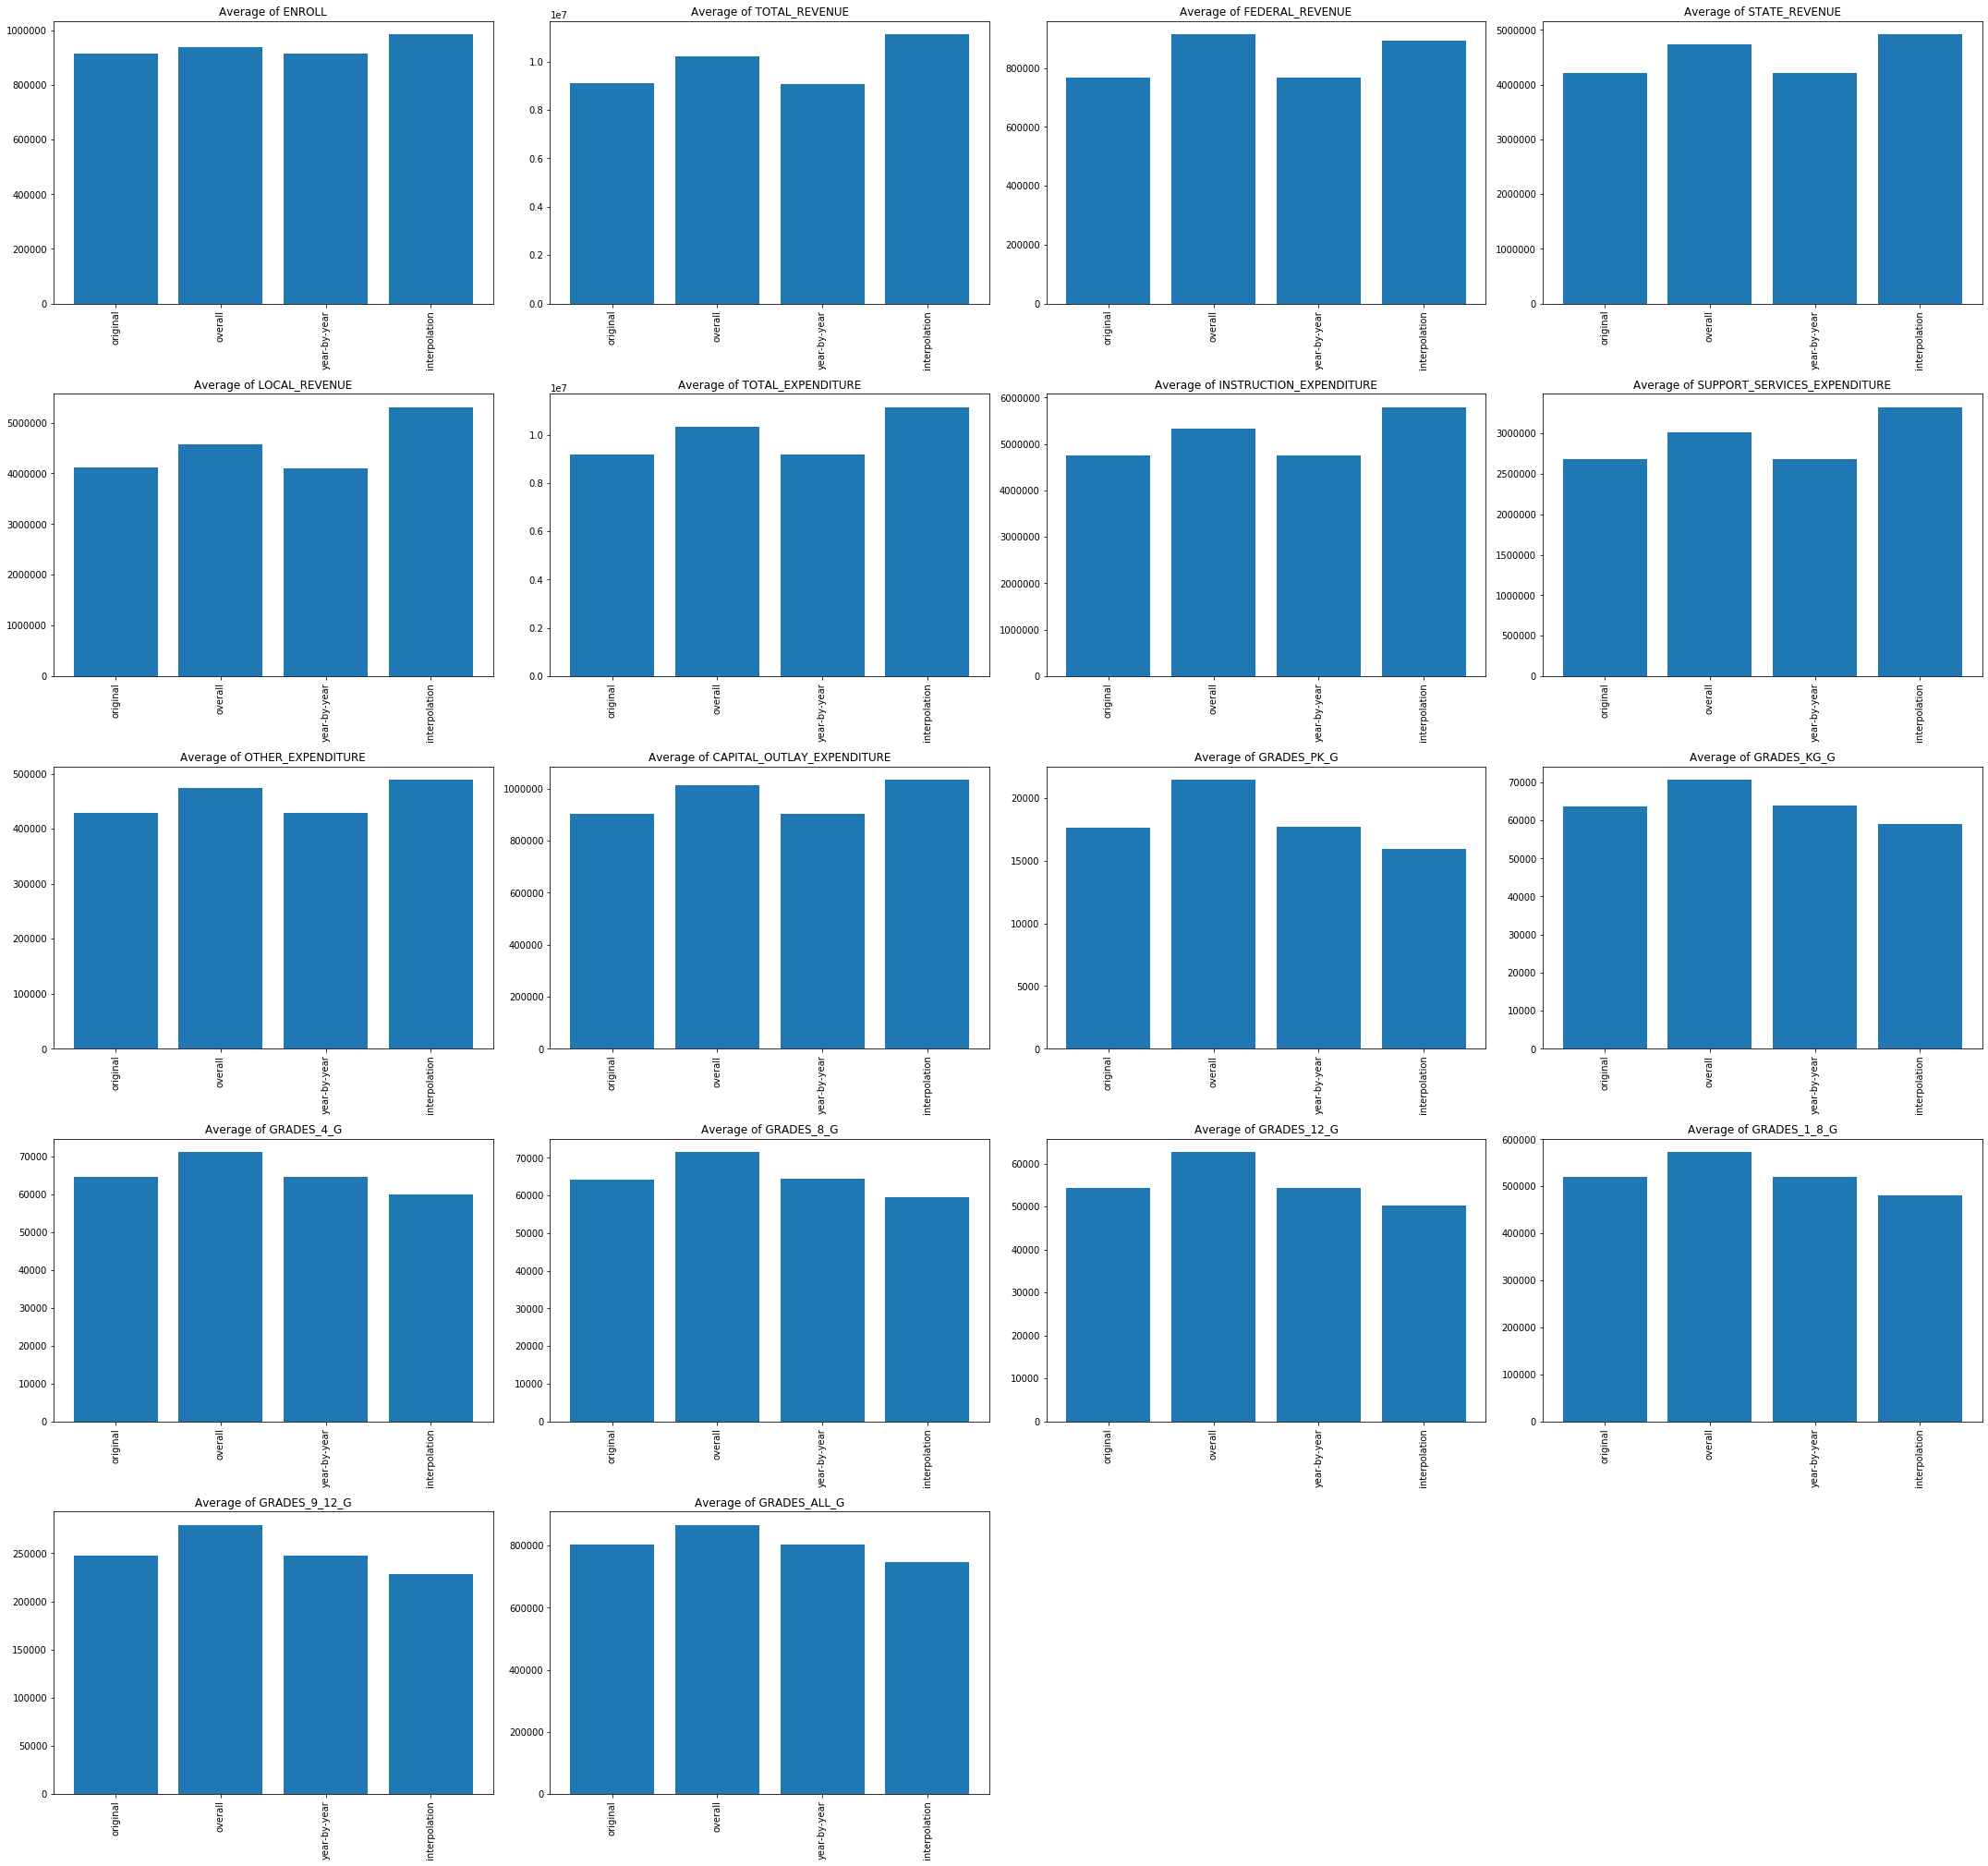

In [12]:
# We can comapare with mean():
fig = plt.figure(figsize=(30,100))

for i, col in enumerate(filling_list):
    df4 = pd.concat([df[col], df1[col], df2[col], df3[col]], axis=1)
    
    plt.subplot(len(filling_list), 4, i+1)
    plt.bar(["original", "overall", "year-by-year", "interpolation"], df4.mean())
    plt.xticks(rotation=90)
    plt.title("Average of {}".format(col))
    
plt.tight_layout()
plt.show()

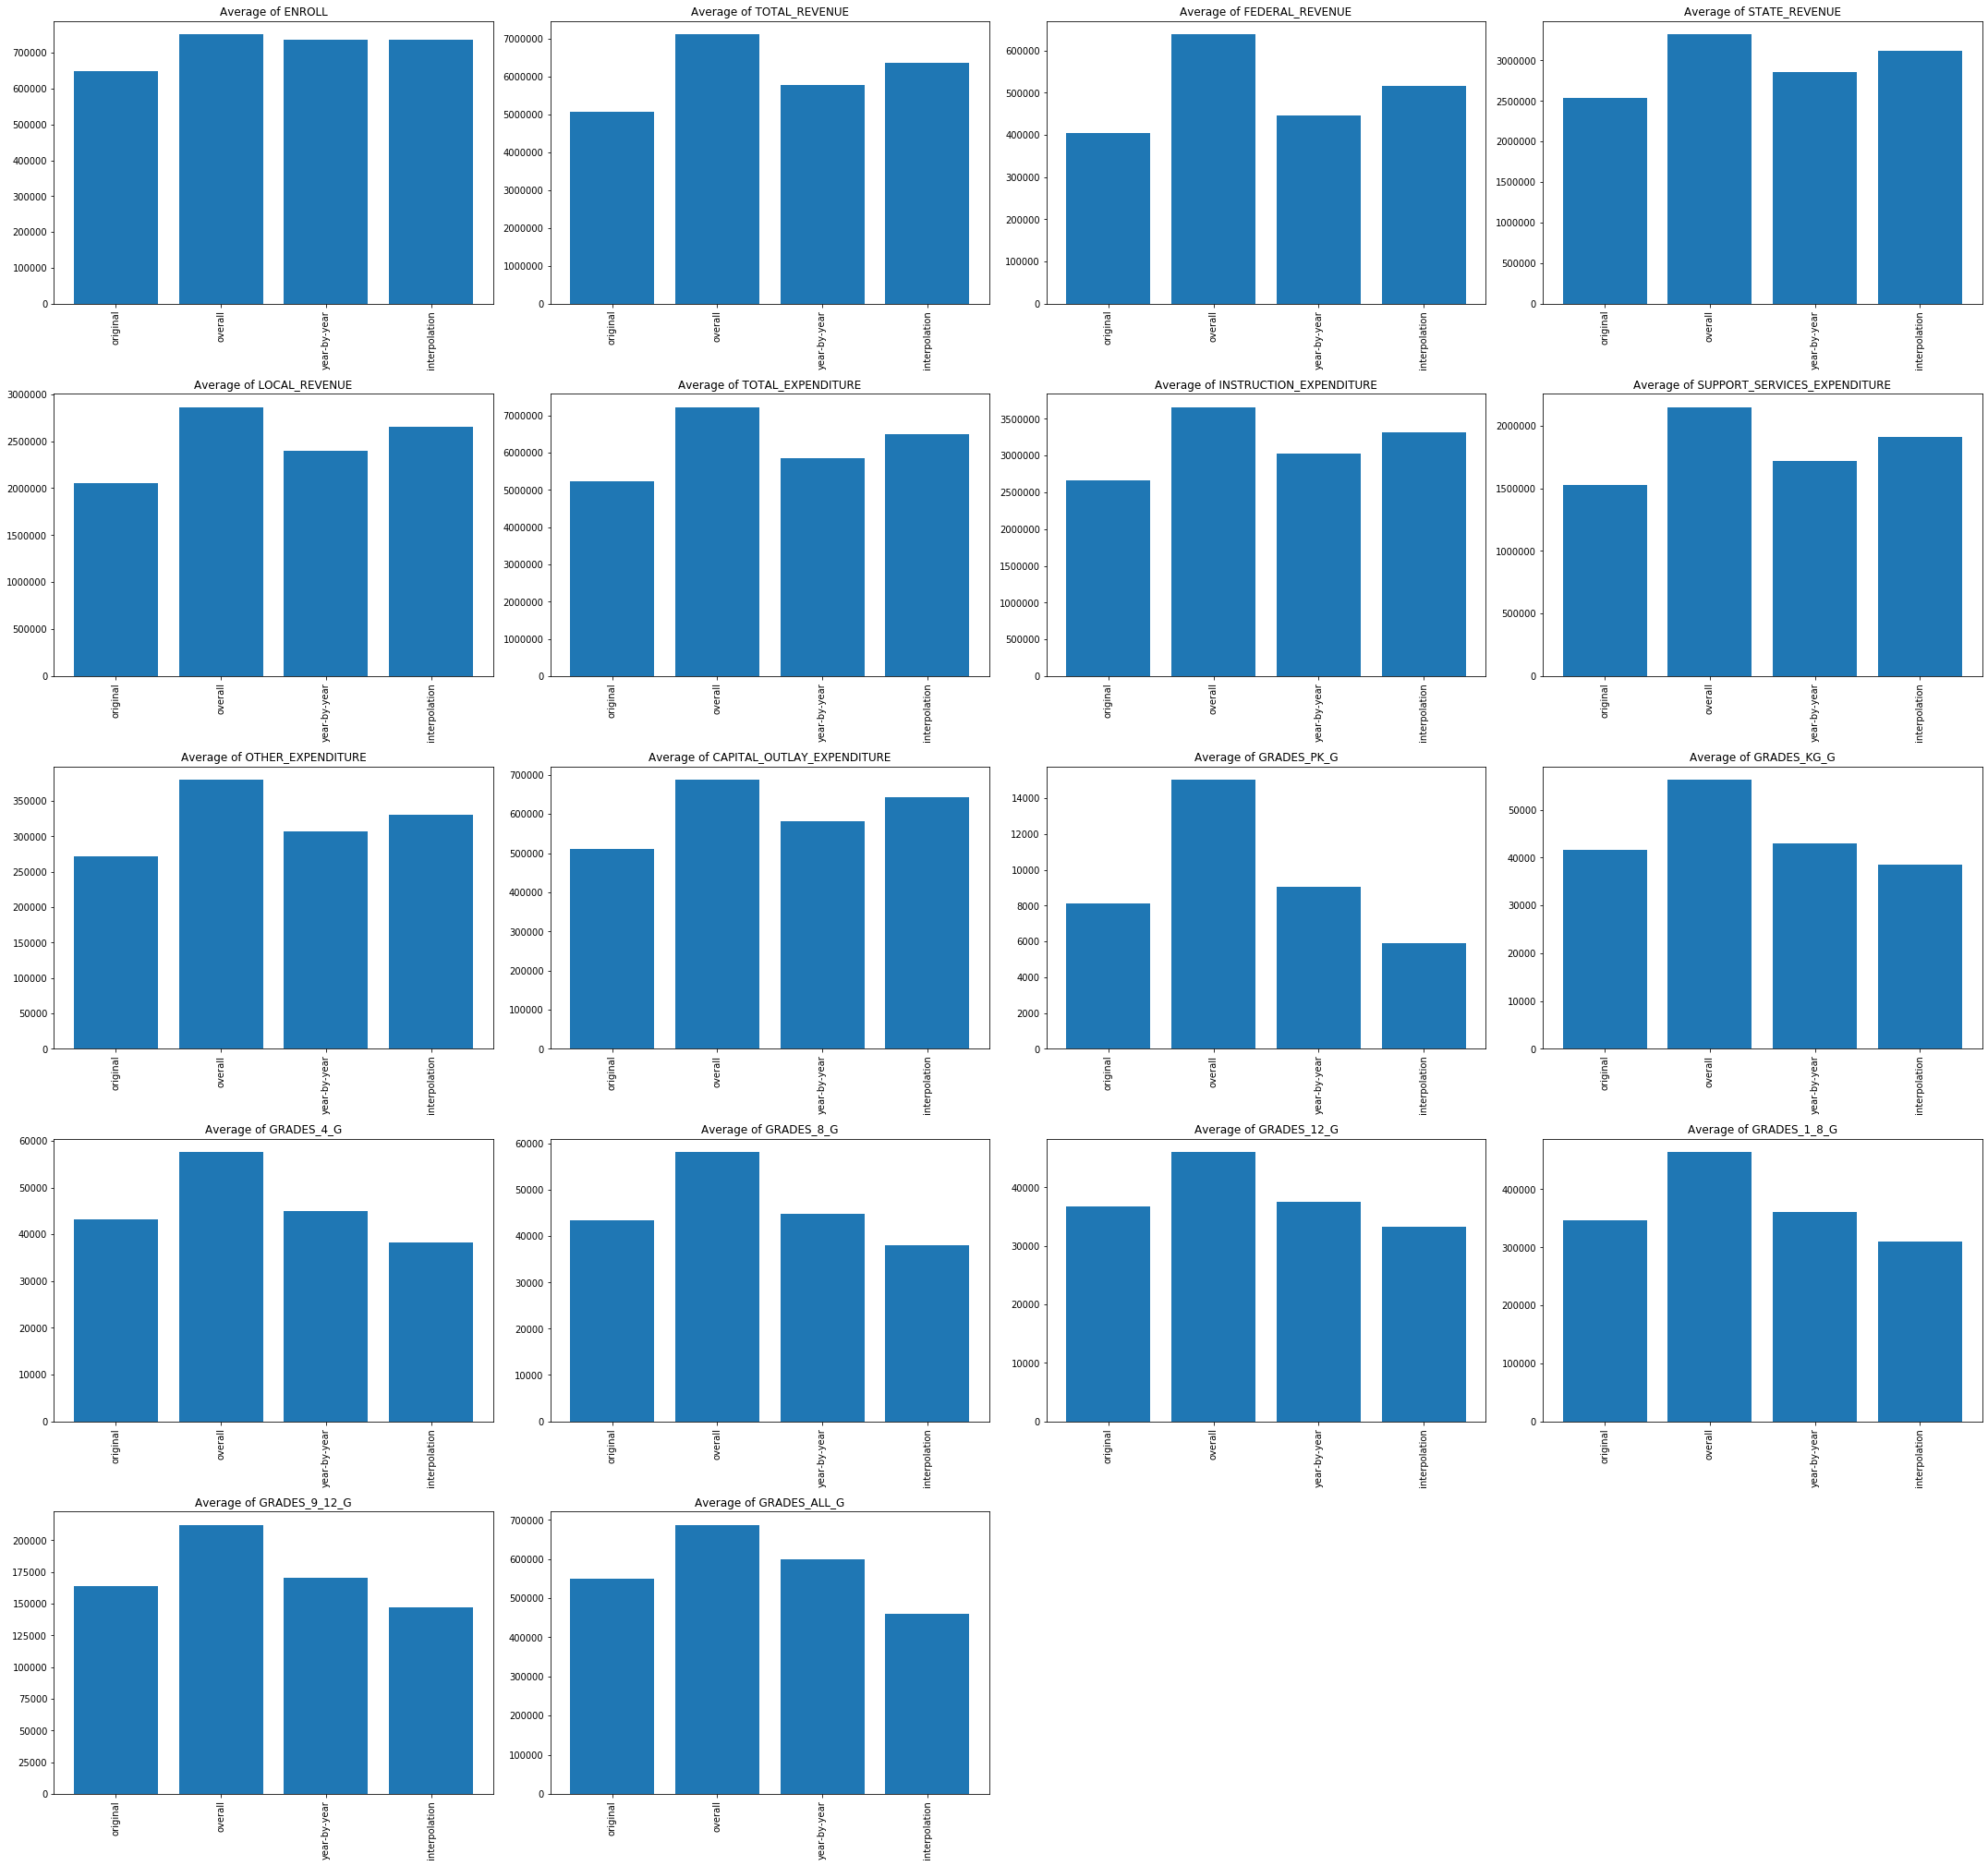

In [14]:
# We can compare with median():
fig = plt.figure(figsize=(30,100))

for i, col in enumerate(filling_list):
    df4 = pd.concat([df[col], df1[col], df2[col], df3[col]], axis=1)
    
    plt.subplot(len(filling_list), 4, i+1)
    plt.bar(["original", "overall", "year-by-year", "interpolation"], df4.median())
    plt.xticks(rotation=90)
    plt.title("Average of {}".format(col))
    
plt.tight_layout()
plt.show()

As you can see, overall has more differences than others, I think because filling missing value is incorrectly.